In [1]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

## Cleaning the dataset

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess_text(text):
    text = re.sub('r<*?.>','',text)
    text = re.sub('r[^a-zA-Z]',' ',text)
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [17]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [19]:
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one othe reviewer mentioned afte watching 1 oz...
1,A wonderful little production. <br /><br />The...,wonderful little production . < b / > < b / > ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summe wee...
3,Basically there's a family where a little boy ...,basically 's family little boy ( jake ) think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",pette mattei 's `` love time money '' visually...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

## Train the Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8883

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
positive_text = " ".join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['cleaned_review'])

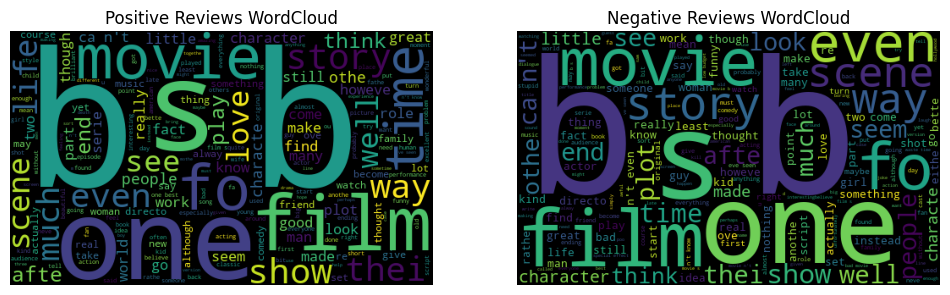

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Positive Reviews WordCloud")
plt.imshow(WordCloud(width=500, height=300).generate(positive_text))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Negative Reviews WordCloud")
plt.imshow(WordCloud(width=500, height=300).generate(negative_text))
plt.axis("off")

plt.show()